# Titanic: Machine Learning from Disaster

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

## Read The Data

In [2]:
df_titanic = pd.read_csv('train.csv')

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Question 1

Bagaimana  sebaran Fare untuk penumpang selamat dan tidak di kapal Titanic? (dengan statistik deskriptif)

### Preprocessing Data

In [4]:
df_titanic1 = df_titanic

### Statistic Descriptive

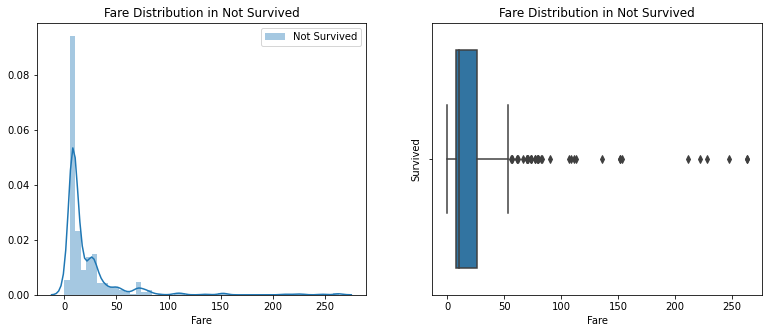

In [5]:
plt.figure(figsize=(13, 5))

plt.subplot(1,2,1)
sns.distplot(df_titanic1.loc[df_titanic1['Survived'] == 0]['Fare'])
plt.legend(['Not Survived'])
plt.title('Fare Distribution in Not Survived')

plt.subplot(1,2,2)
sns.boxplot(df_titanic1.loc[df_titanic1['Survived'] == 0]['Fare'])
plt.ylabel('Survived')
plt.title('Fare Distribution in Not Survived')

plt.show()

In [6]:
df_titanic1.loc[df_titanic1['Survived'] == 0]['Fare'].describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

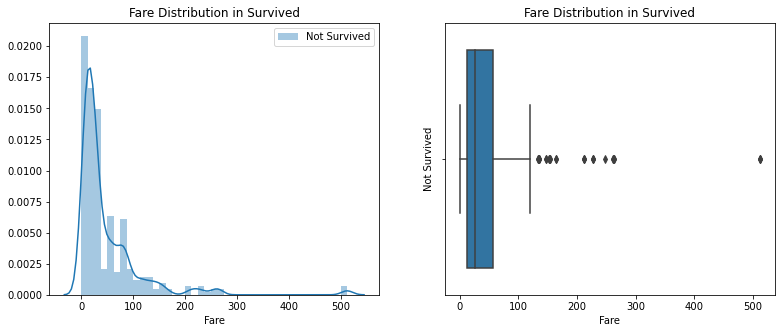

In [7]:
plt.figure(figsize=(13, 5))

plt.subplot(1,2,1)
sns.distplot(df_titanic1.loc[df_titanic1['Survived'] == 1]['Fare'])
plt.legend(['Not Survived'])
plt.title('Fare Distribution in Survived')

plt.subplot(1,2,2)
sns.boxplot(df_titanic1.loc[df_titanic1['Survived'] == 1]['Fare'])
plt.ylabel('Not Survived')
plt.title('Fare Distribution in Survived')

plt.show()

In [8]:
df_titanic1.loc[df_titanic1['Survived'] == 1]['Fare'].describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

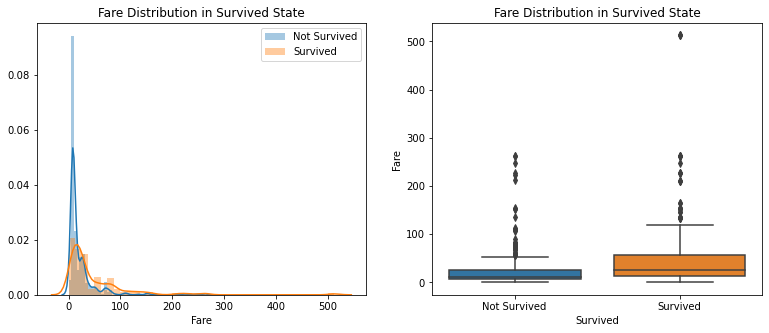

In [9]:
plt.figure(figsize=(13, 5))

plt.subplot(1,2,1)
sns.distplot(df_titanic1.loc[df_titanic1['Survived'] == 0]['Fare'])
sns.distplot(df_titanic1.loc[df_titanic1['Survived'] == 1]['Fare'])
plt.legend(['Not Survived','Survived'])
plt.title('Fare Distribution in Survived State')

plt.subplot(1,2,2)
sns.boxplot(x = df_titanic1['Survived'], y = df_titanic1['Fare'])
plt.xticks([0,1],['Not Survived','Survived'])
plt.title('Fare Distribution in Survived State')

plt.show()

## Question 2

Prediksi berapa umur (Age) penumpang Titanic yang tidak diketahui? (dengan prediktif analitik, regresi)

### Preprocessing data

In [10]:
df_titanic2 = df_titanic

#### Drop PassengerId, Ticket, and Cabin

In [11]:
df_titanic2 = df_titanic2.drop(columns = ['PassengerId','Ticket','Cabin'])

#### Replace NaN In Embarked

In [12]:
modus_embarked = df_titanic2['Embarked'].value_counts().idxmax()
df_titanic2['Embarked'].replace(np.nan, modus_embarked, inplace=True)

#### Make Dummy Variabel for Sex And Drop Attribute Sex

In [13]:
dummy_variable_1 = pd.get_dummies(df_titanic2['Sex'])
dummy_variable_1.rename(columns={'female':'Sex-Female', 'male':'Sex-Male'}, inplace=True)
df_titanic2 = pd.concat([df_titanic2, dummy_variable_1], axis=1)

In [14]:
df_titanic2 = df_titanic2.drop(columns = ['Sex'])

#### Make Dummy Variabel for Embarked And Drop Attribute Embarked

In [15]:
dummy_variable_2 = pd.get_dummies(df_titanic2['Embarked'])
dummy_variable_2.rename(columns={'C':'Embarked-C', 'Q':'Embarked-Q','S':'Embarked-S'}, inplace=True)
df_titanic2 = pd.concat([df_titanic2, dummy_variable_2], axis=1)

In [16]:
df_titanic2 = df_titanic2.drop(columns = ['Embarked'])

#### Adding Attribute Squared

In [17]:
df_titanic2['Pclass2'] = df_titanic2['Pclass']**2
df_titanic2['SibSp2'] = df_titanic2['SibSp']**2
df_titanic2['Parch2'] = df_titanic2['Parch']**2
df_titanic2['SibSp2'] = df_titanic2['SibSp']**2
df_titanic2['Fare2'] = df_titanic2['Fare']**2

#### Drop Nan In Age for Feature Set

In [18]:
df_titanic2a = df_titanic2.loc[~df_titanic2['Age'].isnull()]

#### Check Correlation

In [19]:
def pair_plot(df, col):
    pp = sns.pairplot(data=df,
                 palette='colorblind',
                 y_vars=['Age'],
                 x_vars=[col],
                 )
    pp.fig.set_size_inches(15,10)
    plt.show()

Pair Plot of Survived with target


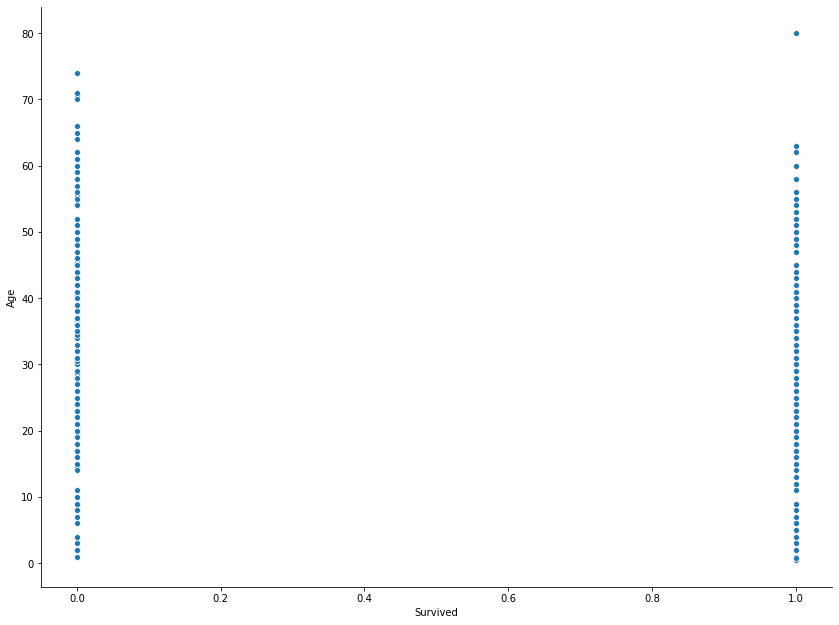

Pair Plot of Pclass with target


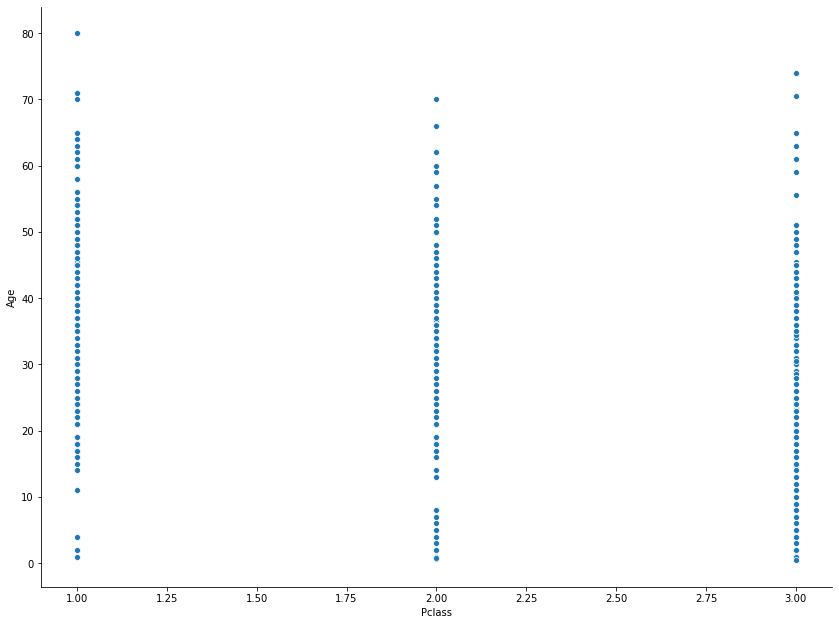

Pair Plot of SibSp with target


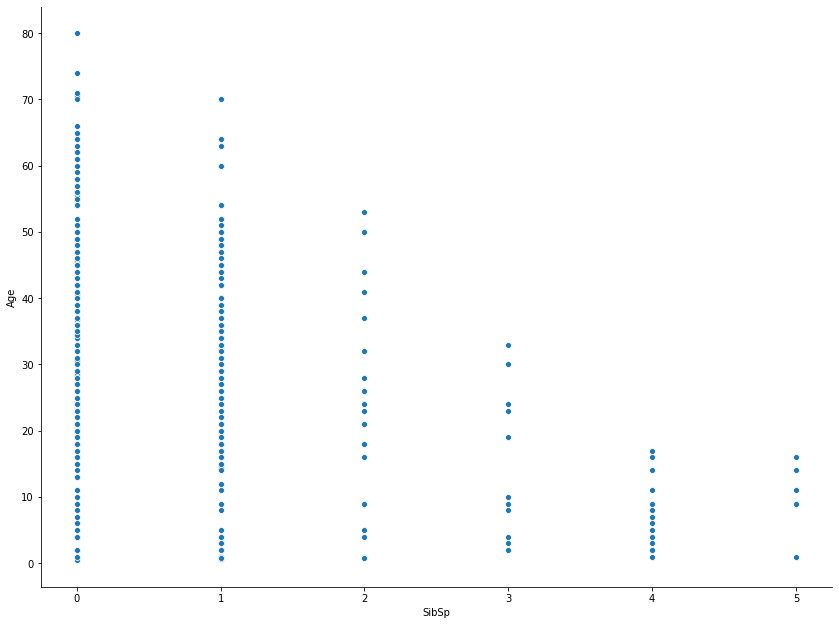

Pair Plot of Parch with target


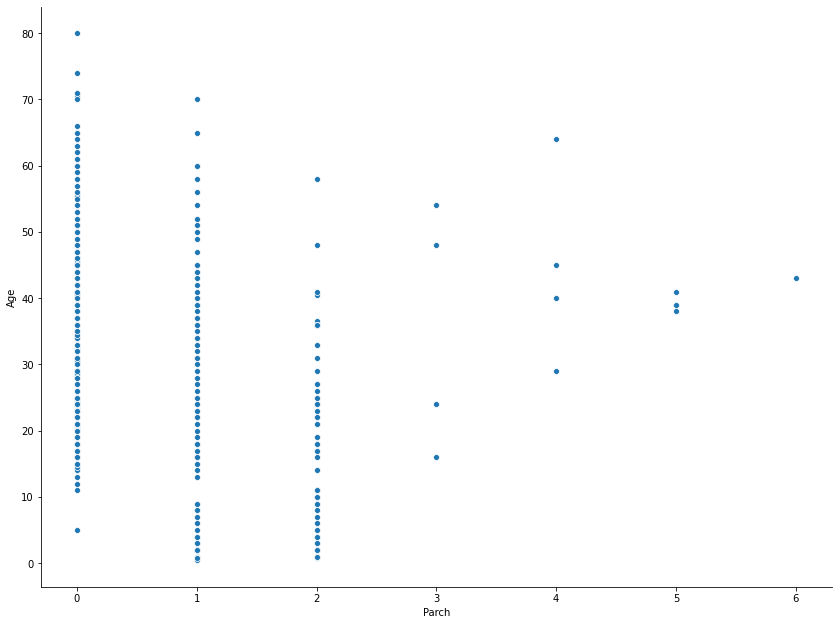

Pair Plot of Fare with target


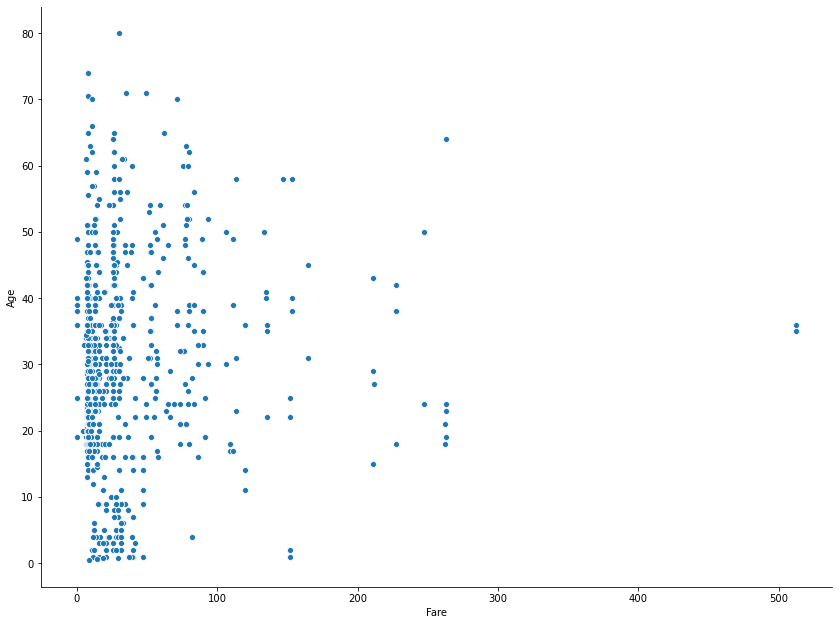

Pair Plot of Sex-Female with target


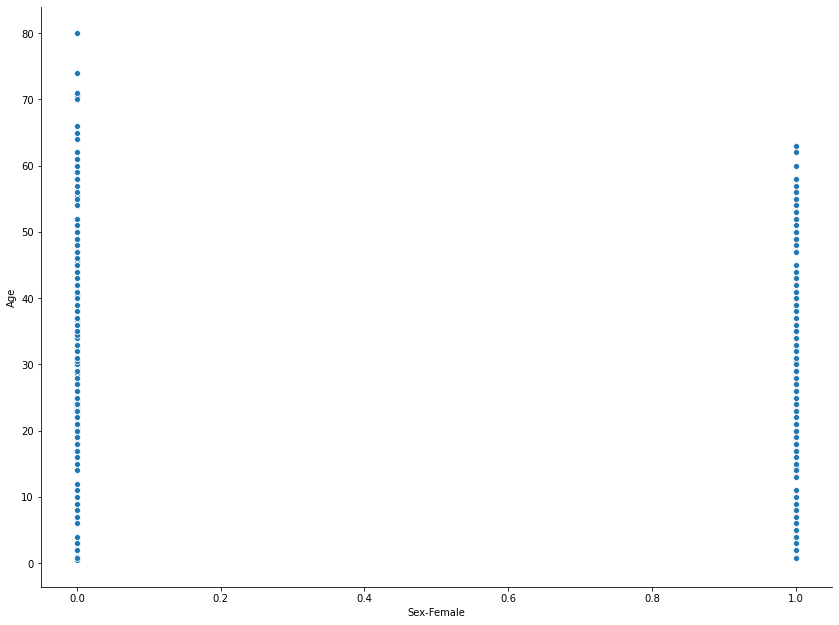

Pair Plot of Sex-Male with target


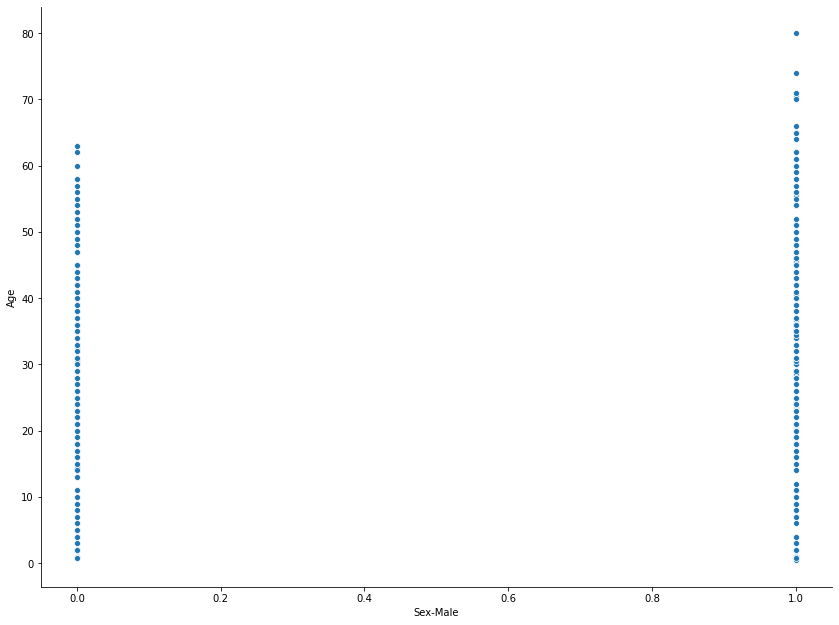

Pair Plot of Embarked-C with target


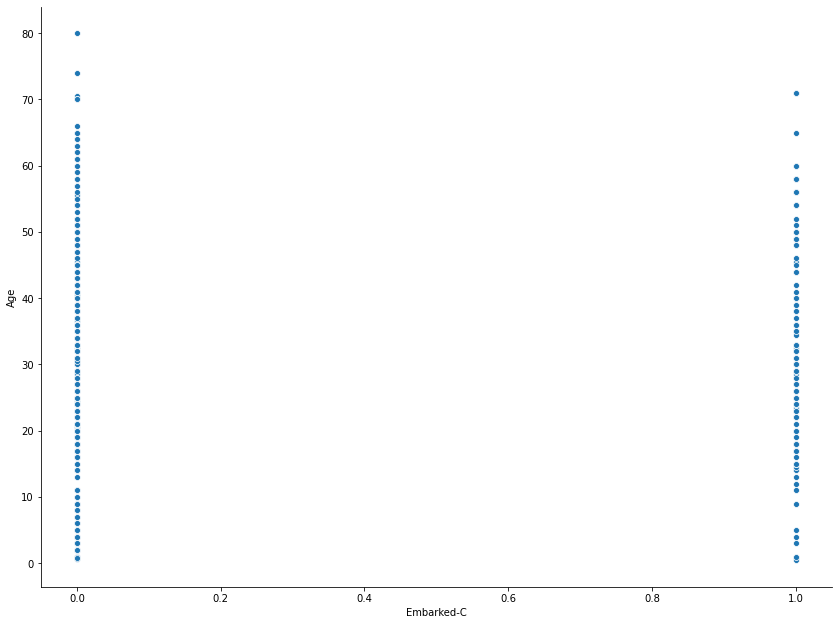

Pair Plot of Embarked-Q with target


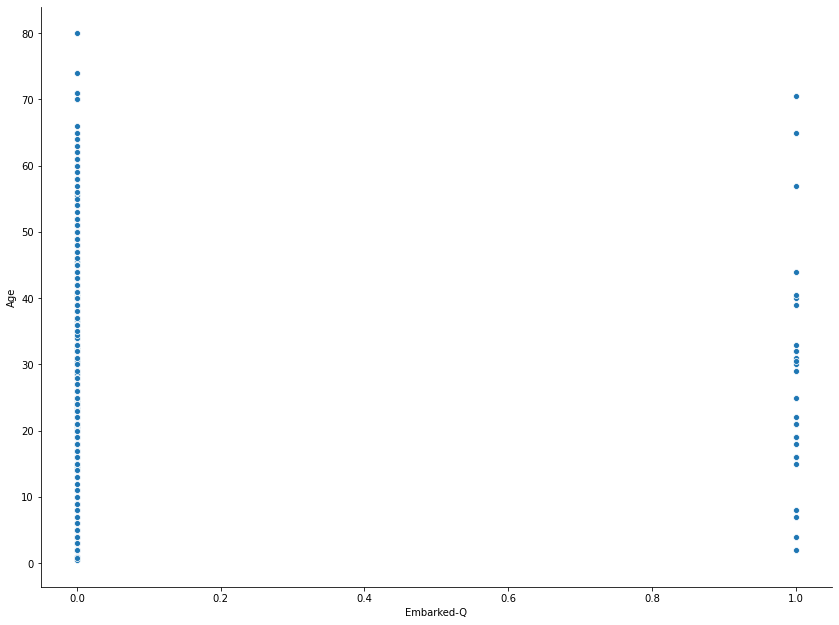

Pair Plot of Embarked-S with target


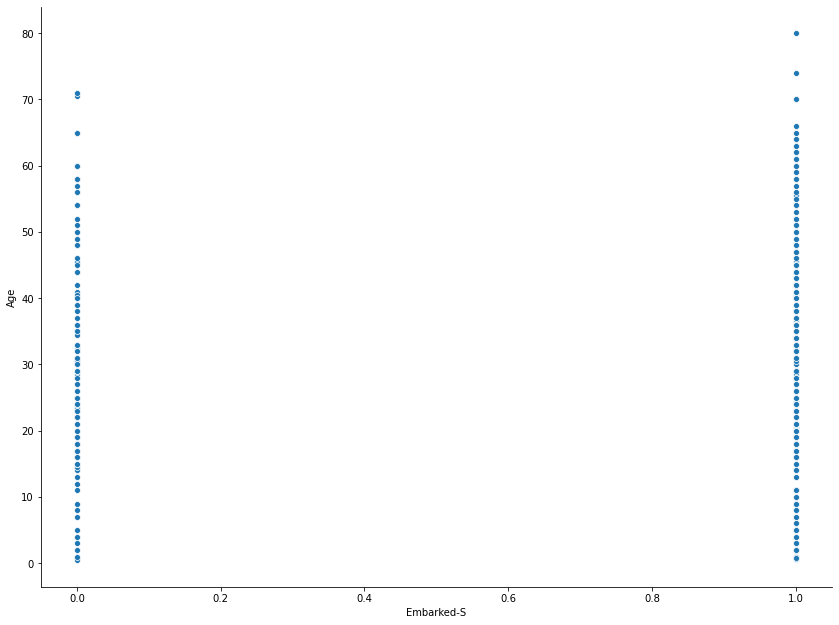

Pair Plot of Pclass2 with target


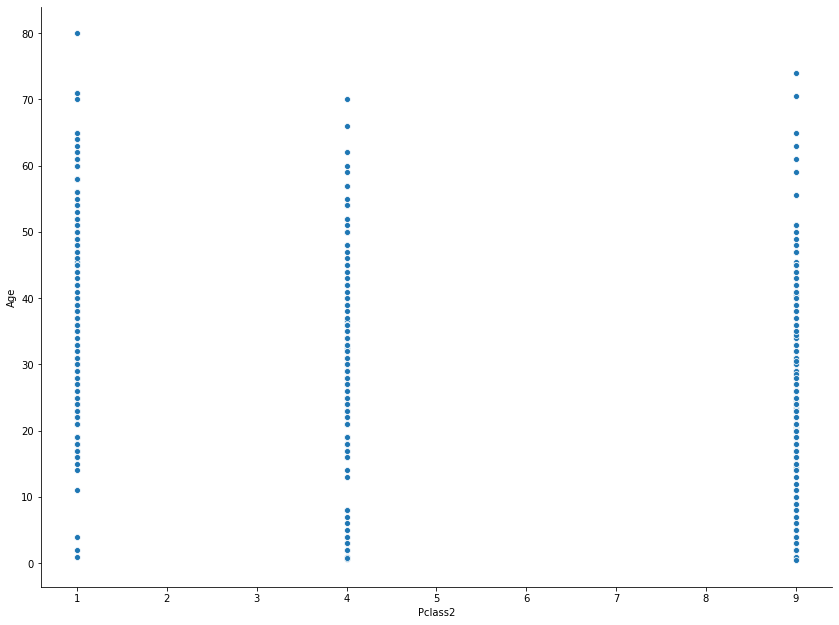

Pair Plot of SibSp2 with target


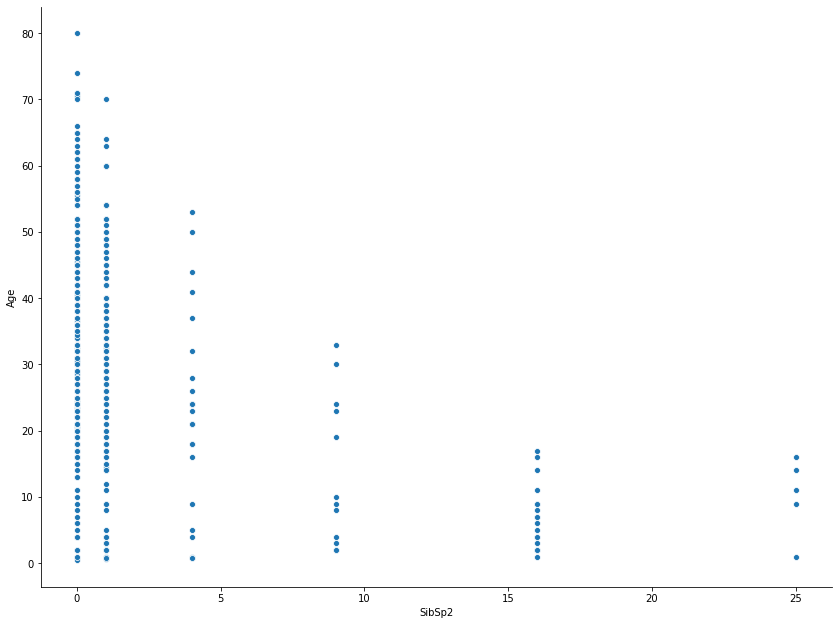

Pair Plot of Parch2 with target


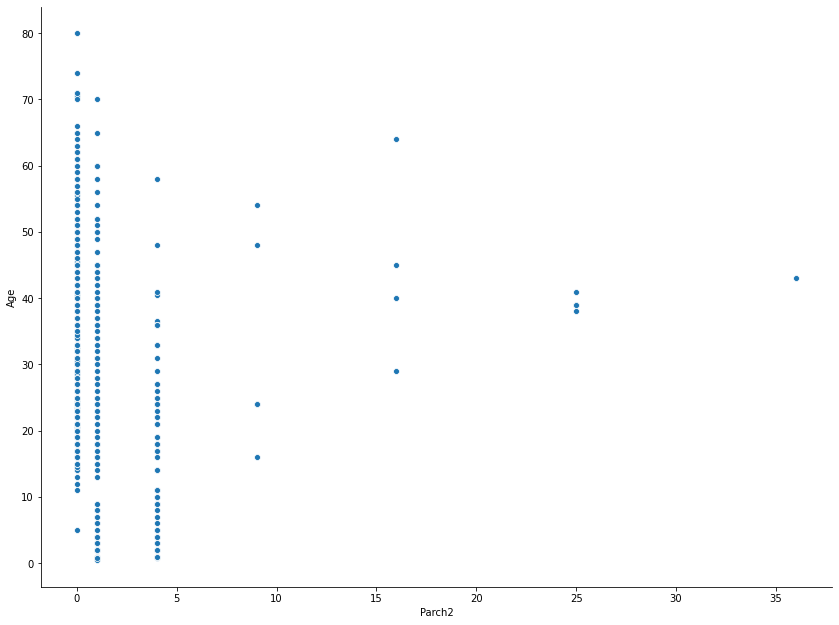

Pair Plot of Fare2 with target


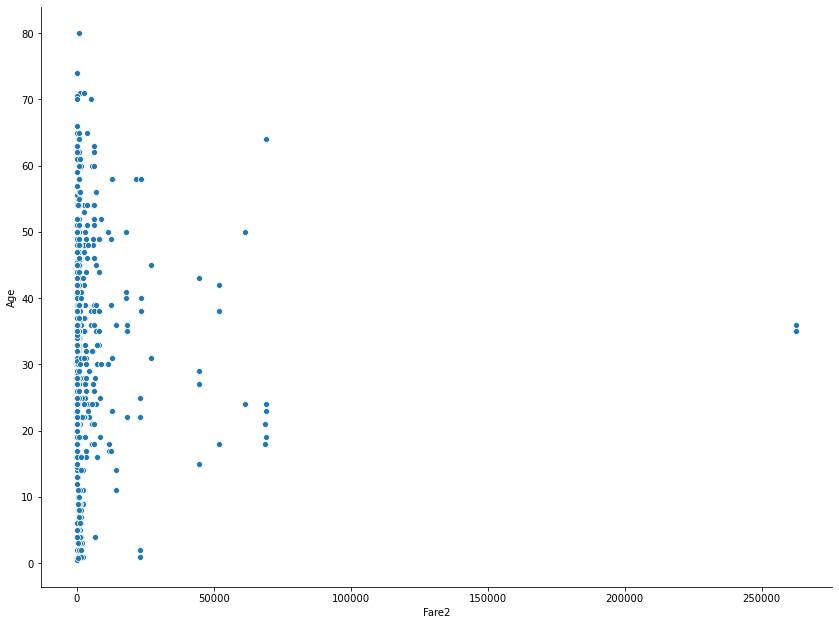

In [20]:
target_cols = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex-Female', 
               'Sex-Male', 'Embarked-C', 'Embarked-Q', 'Embarked-S', 'Pclass2',
               'SibSp2', 'Parch2', 'Fare2']
for c in target_cols:
    print('Pair Plot of {} with target'.format(c))
    pair_plot(df_titanic2a, c)
    print('='*110)

In [21]:
df_titanic2a.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex-Female,Sex-Male,Embarked-C,Embarked-Q,Embarked-S,Pclass2,SibSp2,Parch2,Fare2
Survived,1.0,-0.36,-0.077,-0.017,0.093,0.27,0.54,-0.54,0.19,-0.05,-0.16,-0.36,-0.085,0.004,0.16
Pclass,-0.36,1.0,-0.37,0.067,0.026,-0.55,-0.16,0.16,-0.28,0.13,0.19,0.99,0.14,0.069,-0.28
Age,-0.077,-0.37,1.0,-0.31,-0.19,0.096,-0.093,0.093,0.036,-0.022,-0.023,-0.36,-0.32,-0.039,0.047
SibSp,-0.017,0.067,-0.31,1.0,0.38,0.14,0.1,-0.1,-0.045,0.052,0.018,0.072,0.91,0.21,0.029
Parch,0.093,0.026,-0.19,0.38,1.0,0.21,0.25,-0.25,-0.0088,-0.0091,0.012,0.027,0.33,0.88,0.095
Fare,0.27,-0.55,0.096,0.14,0.21,1.0,0.18,-0.18,0.3,-0.063,-0.25,-0.52,0.077,0.12,0.87
Sex-Female,0.54,-0.16,-0.093,0.1,0.25,0.18,1.0,-1.0,0.1,0.026,-0.11,-0.16,0.031,0.18,0.08
Sex-Male,-0.54,0.16,0.093,-0.1,-0.25,-0.18,-1.0,1.0,-0.1,-0.026,0.11,0.16,-0.031,-0.18,-0.08
Embarked-C,0.19,-0.28,0.036,-0.045,-0.0088,0.3,0.1,-0.1,1.0,-0.095,-0.89,-0.25,-0.086,-0.042,0.22
Embarked-Q,-0.05,0.13,-0.022,0.052,-0.0091,-0.063,0.026,-0.026,-0.095,1.0,-0.38,0.14,0.083,0.013,-0.034


### Regression Modelling

In [22]:
df_titanic2b = df_titanic2.loc[df_titanic2['Age'].isnull()] # for prediction

#### Multi Linear Regression

In [23]:
features = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex-Female',
            'Sex-Male', 'Embarked-C', 'Embarked-Q', 'Embarked-S']
X = df_titanic2a[features]
y = df_titanic2a['Age']

In [24]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     33.36
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           1.14e-44
Time:                        23:00:15   Log-Likelihood:                -2808.7
No. Observations:                 714   AIC:                             5635.
Df Residuals:                     705   BIC:                             5676.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5617      1.211     24.416      0.0

In [25]:
Xtest = df_titanic2b[features]
Xtest = sm.add_constant(Xtest)

In [26]:
ypred = results.predict(Xtest) 

#### Multi Polynominal Regression

In [27]:
features2 = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex-Female',
            'Sex-Male', 'Embarked-C', 'Embarked-Q', 'Embarked-S', 'Pclass2',
            'SibSp2', 'Parch2', 'Fare2']
X2 = df_titanic2a[features2]
y2 = df_titanic2a['Age']

In [28]:
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2, X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     28.05
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           3.50e-52
Time:                        23:00:16   Log-Likelihood:                -2783.3
No. Observations:                 714   AIC:                             5593.
Df Residuals:                     701   BIC:                             5652.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.2629      2.974     12.192      0.0

In [29]:
Xtest2 = df_titanic2b[features2]
Xtest2 = sm.add_constant(Xtest2)

In [30]:
ypred2 = results2.predict(Xtest2)

#### Result

In [31]:
df_titanic2b['Age_pred'] = pd.DataFrame(ypred)
df_titanic2b['Age_pred2'] = pd.DataFrame(ypred2)

<ipython-input-31-0d83294a1b5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic2b['Age_pred'] = pd.DataFrame(ypred)
<ipython-input-31-0d83294a1b5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic2b['Age_pred2'] = pd.DataFrame(ypred2)


In [32]:
df_titanic2b[['Name','Age_pred','Age_pred2']]

,Name,Age_pred,Age_pred2
5,"Moran, Mr. James",31.660452,31.073132
17,"Williams, Mr. Charles Eugene",30.462362,29.807689
19,"Masselmani, Mrs. Fatima",20.794150,21.889394
26,"Emir, Mr. Farred Chehab",27.334866,27.428393
28,"O'Dwyer, Miss. Ellen ""Nellie""",25.126774,25.563494
...,...,...,...
859,"Razi, Mr. Raihed",27.334815,27.428180
863,"Sage, Miss. Dorothy Edith ""Dolly""",-5.623419,-20.158546
868,"van Melkebeke, Mr. Philemon",29.065587,29.314957
878,"Laleff, Mr. Kristo",29.085084,29.396138


## Question 3

Dengan menggunakan prediktif analitik klasifikasi, berapa persentase keselamatan (Survived) penumpang  Titanic? (dengan prediktif analitik, klasifikasi)

### Data preprocessing

In [33]:
df_titanic3 = df_titanic

#### Drop PassengerId, Name, Ticket, and Cabin

In [34]:
df_titanic3 = df_titanic3.drop(columns = ['PassengerId','Name','Ticket','Cabin'])

#### Replace NaN In Age

In [35]:
avg_age = df_titanic3['Age'].astype('float').mean()
df_titanic3['Age'].replace(np.nan, avg_age, inplace=True)

#### Replace NaN In Embarked

In [36]:
modus_embarked = df_titanic3['Embarked'].value_counts().idxmax()
df_titanic3['Embarked'].replace(np.nan, modus_embarked, inplace=True)

#### Make Dummy Variabel for Sex And Drop Attribute Sex

In [37]:
dummy_variable_1 = pd.get_dummies(df_titanic3['Sex'])
dummy_variable_1.rename(columns={'female':'Sex-female', 'male':'Sex-male'}, inplace=True)
df_titanic3 = pd.concat([df_titanic3, dummy_variable_1], axis=1)
df_titanic3 = df_titanic3.drop(columns = ['Sex'])

#### Make Dummy Variabel for Embarked And Drop Attribute Embarked

In [38]:
dummy_variable_2 = pd.get_dummies(df_titanic3['Embarked'])
dummy_variable_2.rename(columns={'C':'Embarked-C', 'Q':'Embarked-Q', 'S':'Embarked-S'}, inplace=True)
df_titanic3 = pd.concat([df_titanic3, dummy_variable_2], axis=1)
df_titanic3 = df_titanic3.drop(columns = ['Embarked'])

#### Feature Set

In [39]:
x = df_titanic3[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex-female', 'Sex-male', 'Embarked-C', 'Embarked-Q', 'Embarked-S']]

In [40]:
y = df_titanic3['Survived'].values

#### Normalize Feature Set

In [41]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

#### Split Train And Test in Feature Set

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (712, 10) (712,)
Test set: (179, 10) (179,)


### Classification Modeling

#### From Data

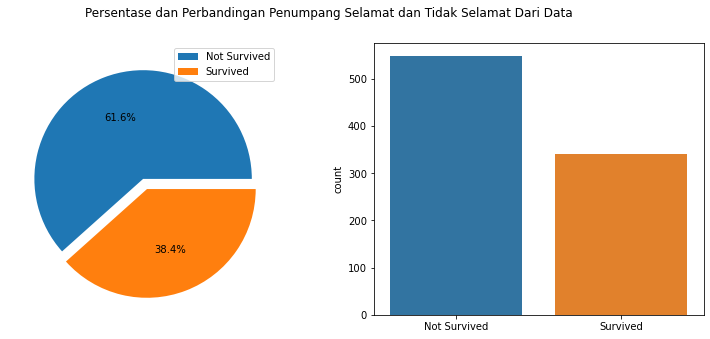

In [43]:
plt.figure(figsize=(13, 5))
plt.suptitle('Persentase dan Perbandingan Penumpang Selamat dan Tidak Selamat Dari Data')

plt.subplot(1,2,1)
plt.pie(pd.DataFrame(y)[0].value_counts(), autopct='%1.1f%%', explode=[0,0.1])
plt.legend(['Not Survived','Survived'])

plt.subplot(1,2,2)
sns.countplot(y,label="Count")
plt.xticks([0,1], ['Not Survived','Survived'])

plt.show()

#### KNN

In [44]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_knn=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_knn)
    
    std_acc[n-1]=np.std(y_knn==y_test)/np.sqrt(y_knn.shape[0])

mean_acc

array([0.77653631, 0.81564246, 0.80446927, 0.82122905, 0.83240223,
       0.83798883, 0.83240223, 0.83240223, 0.83240223])

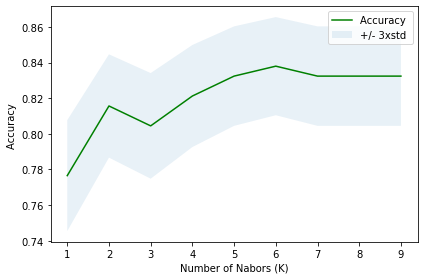

In [45]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [46]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8379888268156425 with k= 6


In [47]:
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
y_knn = neigh.predict(x)
print("Accuracy: ", metrics.accuracy_score(y, y_knn))
print("Precision: ",metrics.precision_score(y, y_knn, average="macro"))
print("Recall: ",metrics.recall_score(y, y_knn, average="macro"))
print("F1-score: ",metrics.f1_score(y, y_knn, average="macro"))

Accuracy:  0.8428731762065096
Precision:  0.8449160447761194
Recall:  0.8190250215703192
F1-score:  0.828125


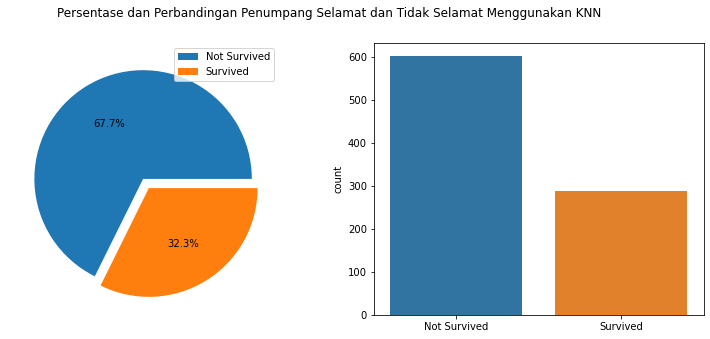

In [48]:
plt.figure(figsize=(13, 5))
plt.suptitle('Persentase dan Perbandingan Penumpang Selamat dan Tidak Selamat Menggunakan KNN')

plt.subplot(1,2,1)
plt.pie(pd.DataFrame(y_knn)[0].value_counts(), autopct='%1.1f%%', explode=[0,0.1])
plt.legend(['Not Survived','Survived'])

plt.subplot(1,2,2)
sns.countplot(y_knn,label="Count")
plt.xticks([0,1], ['Not Survived','Survived'])

plt.show()

#### SVM

In [49]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC()

In [50]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))

Train set Accuracy:  0.8441011235955056


In [51]:
y_svm = clf.predict(x)
print("Accuracy: ", metrics.accuracy_score(y, y_svm))
print("Precision: ",metrics.precision_score(y, y_svm, average="macro"))
print("Recall: ",metrics.recall_score(y, y_svm, average="macro"))
print("F1-score: ",metrics.f1_score(y, y_svm, average="macro"))

Accuracy:  0.8417508417508418
Precision:  0.8564085725858916
Recall:  0.8092944108906146
F1-score:  0.822709587830944


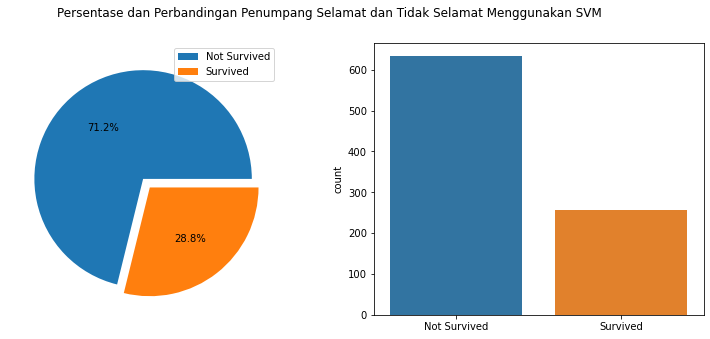

In [52]:
plt.figure(figsize=(13, 5))
plt.suptitle('Persentase dan Perbandingan Penumpang Selamat dan Tidak Selamat Menggunakan SVM')

plt.subplot(1,2,1)
plt.pie(pd.DataFrame(y_svm)[0].value_counts(), autopct='%1.1f%%', explode=[0,0.1])
plt.legend(['Not Survived','Survived'])

plt.subplot(1,2,2)
sns.countplot(y_svm,label="Count")
plt.xticks([0,1], ['Not Survived','Survived'])

plt.show()

## Question 4

### Preprocessing data

In [53]:
df_titanic4 = df_titanic

#### Feature Set

In [54]:
x = df_titanic4[['Pclass', 'Fare']]

#### Normalize Feature Set

In [55]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

### Clustering Modeling

#### K-Means

In [56]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

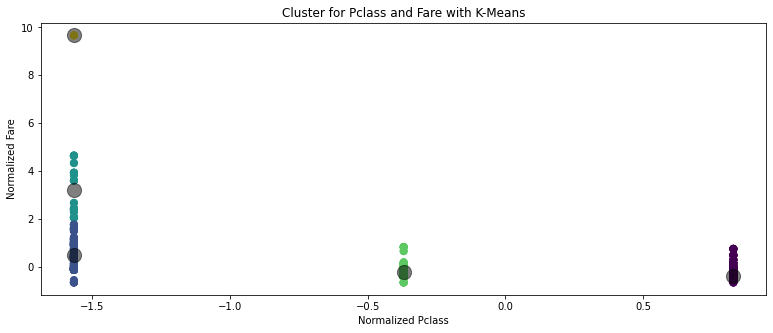

In [57]:
plt.figure(figsize=(13, 5))
plt.ylabel('Normalized Fare')
plt.xlabel('Normalized Pclass')
plt.title('Cluster for Pclass and Fare with K-Means')

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [58]:
n_clusters_ = len(set(y_kmeans)) - (1 if -1 in y_kmeans else 0)
n_noise_ = list(y_kmeans).count(-1)

In [59]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, y_kmeans))

Estimated number of clusters: 5
Estimated number of noise points: 0
Silhouette Coefficient: 0.762


#### DBSCAN

In [60]:
dbscan = DBSCAN(eps=0.5, min_samples=3).fit(x)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
y_dbscan = dbscan.labels_

n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise_ = list(y_dbscan).count(-1)

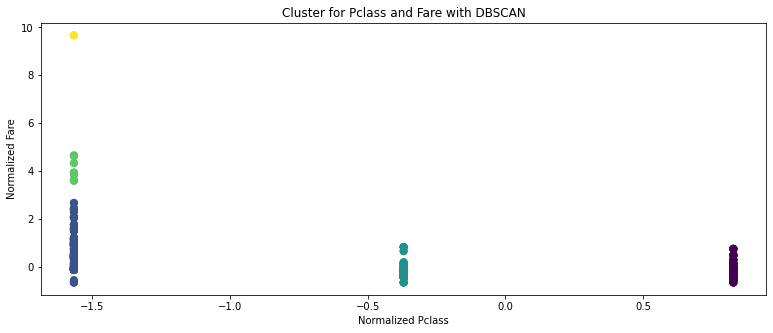

In [61]:
plt.figure(figsize=(13, 5))
plt.ylabel('Normalized Fare')
plt.xlabel('Normalized Pclass')
plt.title('Cluster for Pclass and Fare with DBSCAN')

plt.scatter(x[:, 0], x[:, 1], c=y_dbscan, s=50, cmap='viridis')

In [62]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, y_dbscan))

Estimated number of clusters: 5
Estimated number of noise points: 0
Silhouette Coefficient: 0.747
